# Instacart Market Basket Analysis

## Exploratory Data Analysis

* Identify the total users, orders, most selling products
* Identifying the products that are getting reordered
* Identifying the day of the week where customers making more orders
* Identifying hour of the day where customers making more orders

In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Data Loading 
orders = pd.read_csv('orders_data.csv')

In [9]:
orders.sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,aisle-department
2190260,2161340,96281,prior,3,0,9,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3176049,989435,140031,prior,1,5,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151782,1368453,50743,train,60,2,17,1.0,29270.0,5.0,1.0,Beet Apple Carrot Lemon Ginger Organic Cold Pr...,31.0,7.0,refrigerated,beverages,refrigerated beverages
3444460,448584,151853,prior,10,6,12,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143753,2704983,6383,prior,27,2,12,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print ('Total Orders are {}, Total users are {}'.format(orders['order_id'].nunique(),orders['user_id'].nunique()))

Total Orders are 3421083, Total users are 206209


### Finding Top products based on orders 

In [47]:
print ('Top 5 products by orders')
orders.groupby('product_name',sort =False)['order_id'].count().sort_values(ascending=False).head(5)

Top 5 products by orders


product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Name: order_id, dtype: int64

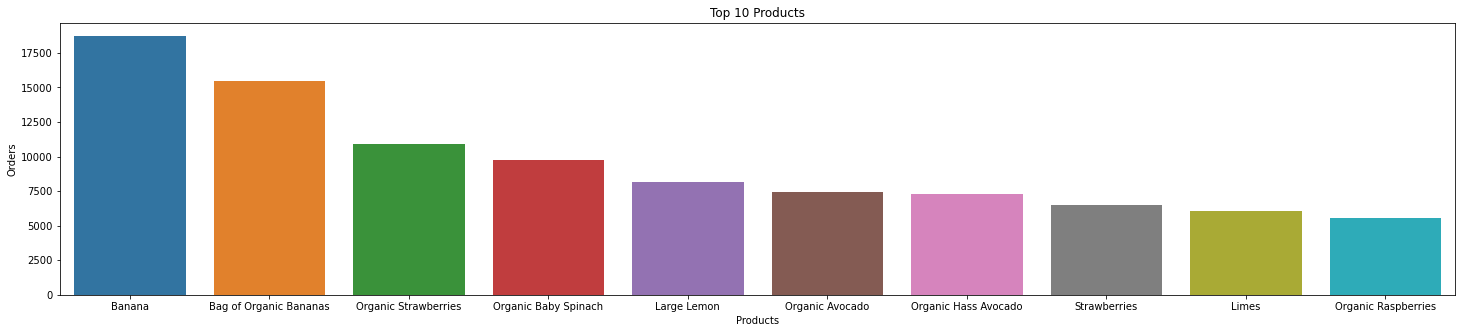

In [60]:
products_top10 = orders.groupby('product_name',sort =False)['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(25,5))
_=sns.barplot(products_top10.index, products_top10.values)
_=plt.xlabel('Products')
_=plt.ylabel('Orders')
_=plt.title('Top 10 Products')

In [53]:
products_top10

product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Organic Blueberries        4966
Organic Whole Milk         4908
Organic Cucumber           4613
Organic Zucchini           4589
Organic Yellow Onion       4290
Organic Garlic             4158
Seedless Red Grapes        4059
Asparagus                  3868
Organic Grape Tomatoes     3823
Organic Red Onion          3818
Name: order_id, dtype: int64

### When orders are made? in which day of week?

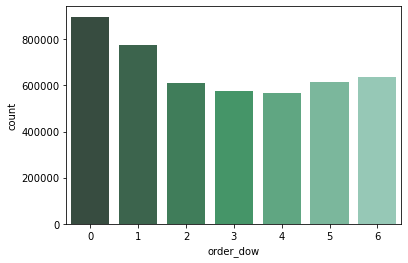

In [30]:
sns.countplot(x='order_dow',data = orders ,palette=sns.color_palette("BuGn_d",7))

__It looks as though 0 represents Saturday and 1 represents Sunday. Wednesday is then the least popular day to make orders.__

### Identifying the hour of a day when most orders are made?

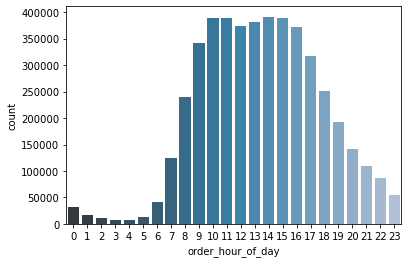

In [29]:
sns.countplot(x='order_hour_of_day',data = orders, palette=sns.color_palette("PuBu_d", 24) )

The 10 AM - 12 PM hour is the most popular time frame to make orders, followed by a dip around lunch time and a pickup in the afternoon.

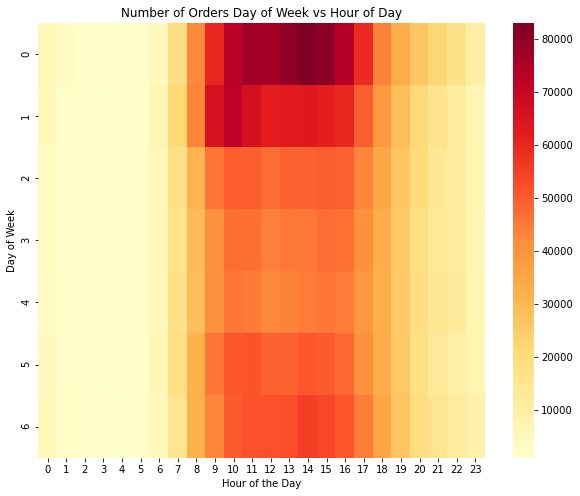

In [32]:
group_hour_dow = orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
group_hour_dow = group_hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(10,8))

sns.heatmap(group_hour_dow, cmap='YlOrRd')

plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.title('Number of Orders Day of Week vs Hour of Day')
plt.show()

__Saturday afternoon and Sunday morning are the most popular time to make orders.__

## Avg Days since prior day

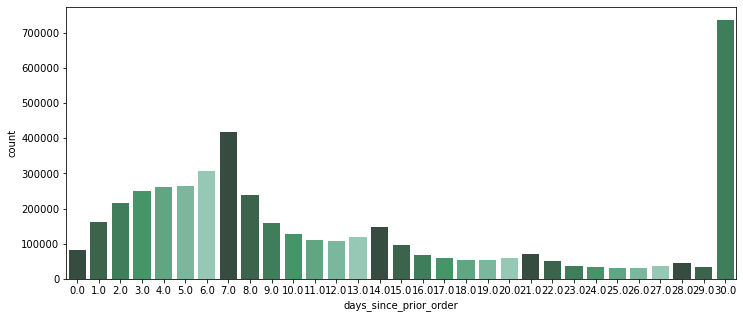

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x='days_since_prior_order',data = orders ,palette=sns.color_palette("BuGn_d",7))

In [39]:
print ('Avg days of order sine prior order is {} days'.format(int(orders['days_since_prior_order'].mean())))

Avg days of order sine prior order is 12 days


### Count of Users by Number of Prior Orders

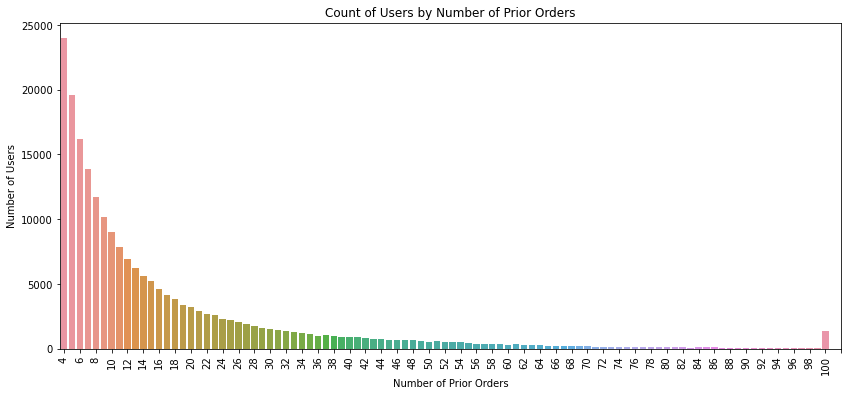

In [41]:
group_user_orders = orders.groupby('user_id')['order_number'].aggregate('max').reset_index()

# sns hist may be better; but possible to make bin size 1?

plt.figure(figsize=(14,6))

sns.barplot(x=group_user_orders['order_number'].value_counts().index, y=group_user_orders['order_number'].value_counts().values)

plt.title('Count of Users by Number of Prior Orders')
plt.xlabel('Number of Prior Orders')
plt.ylabel('Number of Users')
# Did not find a great way in seaborn to make tick labels for every other step; maybe try using xmin(), xmax() or just pandas:
plt.xticks(range(0, 99, 2), range(4,101,2), rotation='vertical')
plt.show()

### Distribution of Add to cart

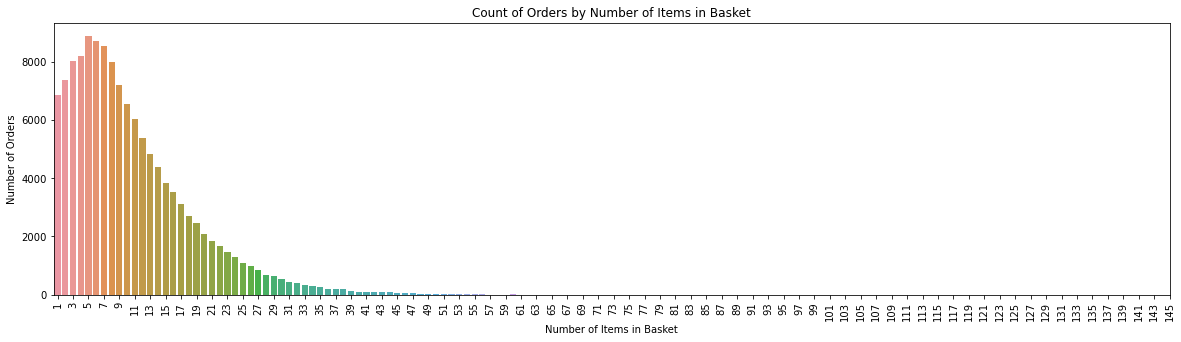

In [46]:

order_sizes = orders.reset_index().groupby(['user_id', 'order_number'])['add_to_cart_order'].aggregate('max')

plt.figure(figsize=(20,5))

sns.barplot(order_sizes.value_counts().index, order_sizes.value_counts().values)

plt.title('Count of Orders by Number of Items in Basket')
plt.xlabel('Number of Items in Basket')
plt.ylabel('Number of Orders')
# Did not find a great way in seaborn to make tick labels for every other step; maybe try using xmin(), xmax() or just pandas:
plt.xticks(range(0, 145, 2), range(1,146,2), rotation='vertical')
plt.show()

In [61]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,aisle-department
0,2539329,1,prior,1,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2398795,1,prior,2,3,7,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,473747,1,prior,3,3,12,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2254736,1,prior,4,4,7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,431534,1,prior,5,4,15,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Top 10 Orders by Aisle - Departments

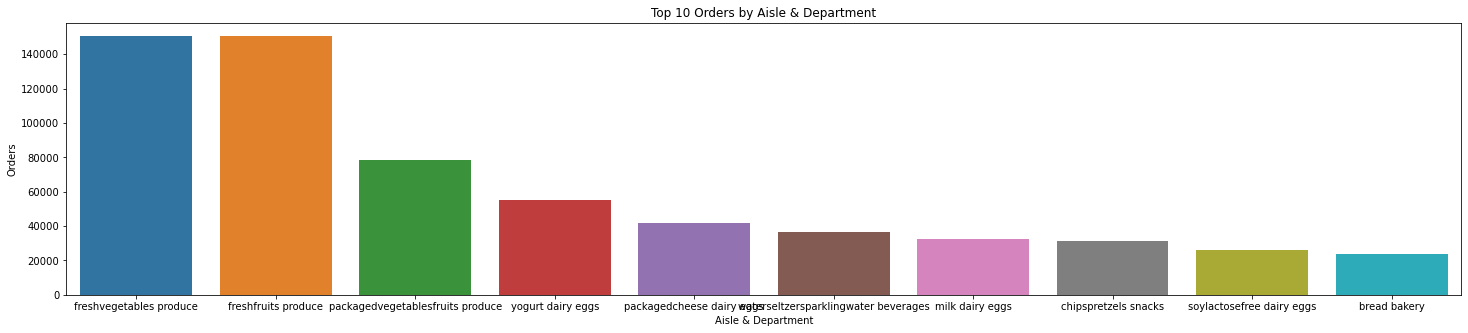

In [67]:
orders_top10 = orders.groupby('aisle-department',sort =False)['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(25,5))
_=sns.barplot(orders_top10.index, orders_top10.values)
_=plt.xlabel('Aisle & Department')
_=plt.ylabel('Orders')
_=plt.title('Top 10 Orders by Aisle & Department')

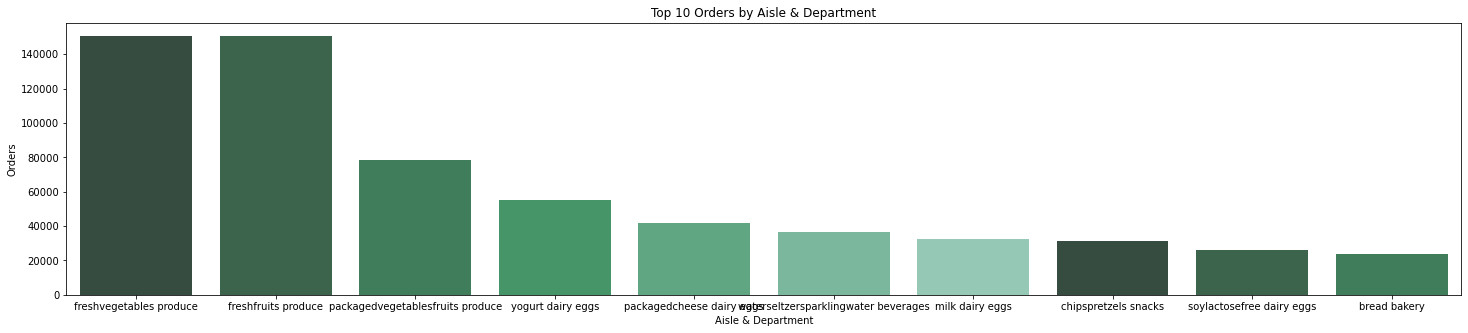

In [65]:
orders_dept_top10 = pd.DataFrame(orders.groupby('department',sort =False)['order_id'].count()).head(10)

plt.figure(figsize=(25,5))
_=sns.barplot(orders_top10.index, orders_top10.values, )
_=plt.xlabel('Aisle & Department')
_=plt.ylabel('Orders')
_=plt.title('Top 10 Orders by Aisle & Department')

In [79]:
total_rows = len(orders) - len(orders[orders['product_id'].isnull()])
departments_pct = pd.DataFrame(orders.groupby('department',sort =False)['order_id'].count())

departments_pct = departments_pct.reset_index()

departments_pct['total'] = total_rows

departments_pct['total_perc'] = (departments_pct['order_id']/departments_pct['total'] )*100

In [80]:
departments_pct

,department,order_id,total,total_perc
0,dairy eggs,217051,1384617,15.675887
1,beverages,114046,1384617,8.236646
2,snacks,118862,1384617,8.584468
3,household,35986,1384617,2.598986
4,breakfast,29500,1384617,2.130553
5,produce,409087,1384617,29.545138
6,frozen,100426,1384617,7.252980
7,deli,44291,1384617,3.198791
8,canned goods,46799,1384617,3.379924
9,personal care,21570,1384617,1.557832


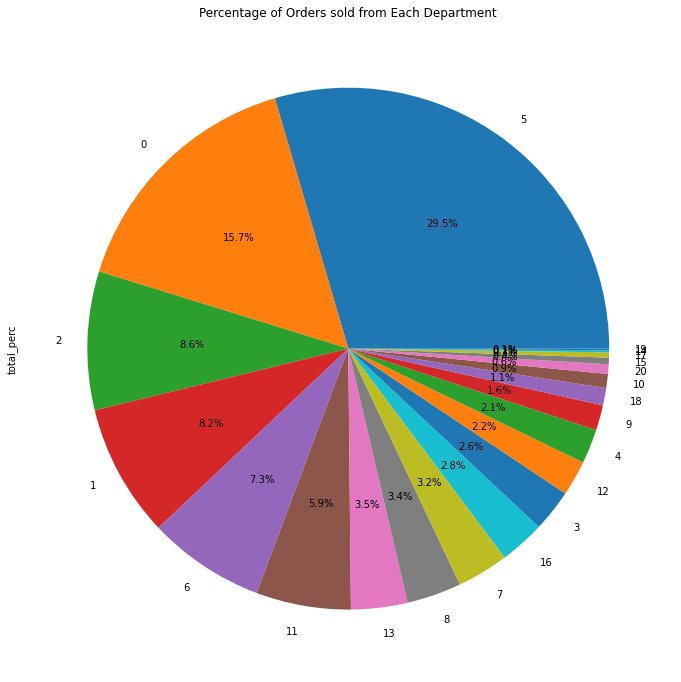

In [82]:
departments_pct.sort_values(by='order_id', ascending=False).total_perc.plot(kind='pie', autopct='%1.1f%%', figsize=(12,12))
plt.title('Percentage of Orders sold from Each Department')
plt.show()